<a href="https://colab.research.google.com/github/r-diazp/DeepL/blob/master/process_opt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

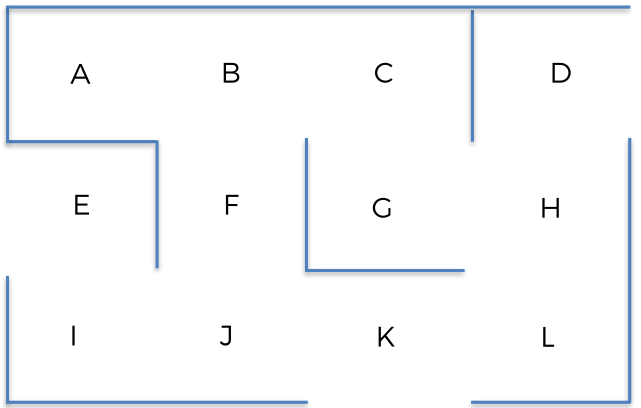

DEFINING THE ENVIRONMENT

In [5]:
gamma = 0.7
alpha = 0.9

# Defining the states
location_to_state = {'A': 0,
                     'B': 1,
                     'C': 2,
                     'D': 3,
                     'E': 4,
                     'F': 5,
                     'G': 6,
                     'H': 7,
                     'I': 8,
                     'J': 9,
                     'K': 10,
                     'L': 11}

# Defining the actions
actions = [0,1,2,3,4,5,6,7,8,9,10,11]

# Defining the rewards
R = np.array([[0,1,0,0,0,0,0,0,0,0,0,0],
              [1,0,1,0,0,1,0,0,0,0,0,0],
              [0,1,0,0,0,0,1,0,0,0,0,0],
              [0,0,0,0,0,0,0,1,0,0,0,0],
              [0,0,0,0,0,0,0,0,1,0,0,0],
              [0,1,0,0,0,0,0,0,0,1,0,0],
              [0,0,1,0,0,0,1,1,0,0,0,0],
              [0,0,0,1,0,0,1,0,0,0,0,1],
              [0,0,0,0,1,0,0,0,0,1,0,0],
              [0,0,0,0,0,1,0,0,1,0,1,0],
              [0,0,0,0,0,0,0,0,0,1,0,1],
              [0,0,0,0,0,0,0,1,0,0,1,0]])



Making a function that returns the shortest route from a starting to ending location
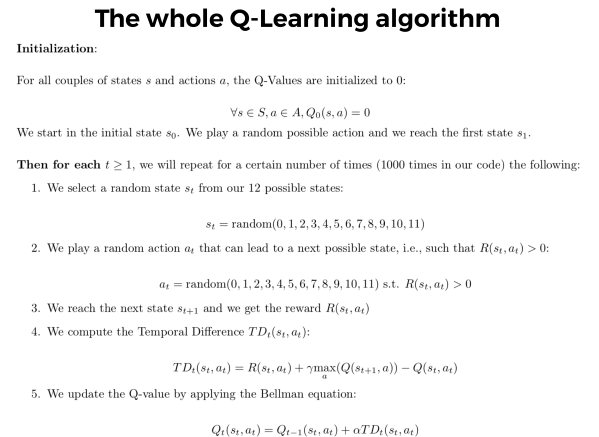

In [7]:

state_to_location = {state: location for location, state in location_to_state.items()} #Change order in location_to_state, first state and after location 

def best_route(starting_location, ending_location, reward=1000):
    # Defining the rewards
    R_new = np.copy(R)
    ending_state = location_to_state[ending_location]
    R_new[ending_state, ending_state] = reward
    
    #For all couples of states s and actions a, the Q-Values are initialized to 0:
    Q = np.array(np.zeros([12,12]))
    print('REWARDS:\n', R_new.astype(int))    
    
    
    #BUILDING THE AI SOLUTION WITH Q-LEARNING
    for i in range(1000):
        current_state = np.random.randint(0,12)
        playable_actions = []
        
        for column in range(12):
            if R_new[current_state, column] > 0:
                playable_actions.append(column)
        next_state = np.random.choice(playable_actions)
        
        #We compute the Temporal Difference
        TD = R_new[current_state, next_state] + gamma * Q[next_state, np.argmax(Q[next_state,])] - Q[current_state, next_state]
        
        #We update the Q-value by applying the Bellman equation:
        Q[current_state, next_state] +=  alpha * TD
    print('\nREWARDS VALUES (Q):\n', Q.astype(int))
    
    
    #ROUTE MAPPING
    route = [starting_location]
    next_location = starting_location
    while (next_location != ending_location):
        starting_state = location_to_state[starting_location]
        next_state = np.argmax(Q[starting_state,])
        next_location = state_to_location[next_state]
        route.append(next_location)
        starting_location = next_location    
    return print('\nThe best route is:', route)

In [9]:
best_route('I', 'D')

REWARDS:
 [[   0    1    0    0    0    0    0    0    0    0    0    0]
 [   1    0    1    0    0    1    0    0    0    0    0    0]
 [   0    1    0    0    0    0    1    0    0    0    0    0]
 [   0    0    0 1000    0    0    0    1    0    0    0    0]
 [   0    0    0    0    0    0    0    0    1    0    0    0]
 [   0    1    0    0    0    0    0    0    0    1    0    0]
 [   0    0    1    0    0    0    1    1    0    0    0    0]
 [   0    0    0    1    0    0    1    0    0    0    0    1]
 [   0    0    0    0    1    0    0    0    0    1    0    0]
 [   0    0    0    0    0    1    0    0    1    0    1    0]
 [   0    0    0    0    0    0    0    0    0    1    0    1]
 [   0    0    0    0    0    0    0    1    0    0    1    0]]

REWARDS VALUES (Q):
 [[   0  562    0    0    0    0    0    0    0    0    0    0]
 [ 395    0  802    0    0  395    0    0    0    0    0    0]
 [   0  562    0    0    0    0 1145    0    0    0    0    0]
 [   0    0    0 3333 